##Scraping images

In [1]:
!pip install bs4 requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode
import requests
from tqdm.notebook import trange, tqdm

In [3]:
# service to avoid blocking requests

API_KEY = '46e7bcbe-7232-47a8-94f4-4bcbedd718c5'

def get_scrapeops_url(url):
    payload = {'api_key': API_KEY, 'url': url}
    proxy_url = 'https://proxy.scrapeops.io/v1/?' + urlencode(payload)
    return proxy_url

In [4]:
url = 'https://www.ralphlauren.nl/en/men/clothing/hoodies-sweatshirts/10204?webcat=men%7Cclothing%7Cmen-clothing-hoodies-sweatshirts'
base_url = 'https://www.ralphlauren.nl/'

200


In [ ]:
def scrape_images(url, base_url):
    images = []
    items_urls = []

    # finding all links to the products
    getUrl = requests.get(get_scrapeops_url(url))
    soup = BeautifulSoup(getUrl.text, 'html.parser')
    pictures = soup.find_all('a', class_='thumb-link')

    for picture in pictures:
        items_urls.append(base_url + picture.get('href'))

    # finding all images of all products in different colors
    for item in tqdm(items_urls):
        getCurrentUrl = requests.get(get_scrapeops_url(item))

        # handling blocking requests
        while getCurrentUrl.status_code == 403 or getCurrentUrl.status_code == 500:
            getCurrentUrl = requests.get(get_scrapeops_url(item))

        currentSoup = BeautifulSoup(getCurrentUrl.text, 'html.parser')
        colorsUrls = currentSoup.find_all('a', class_='swatchanchor swatch')
        
        itemColors = []
        for color in colorsUrls:
            currentUrl = requests.get(get_scrapeops_url(color.get('href')))

            # handling blocking requests
            while currentUrl.status_code == 403 or currentUrl.status_code == 500:
                currentUrl = requests.get(get_scrapeops_url(color.get('href')))
            
            currentColorSoup = BeautifulSoup(currentUrl.text, 'html.parser')
            currentColorImgs = currentColorSoup.find_all('img', class_='popup-img')
            itemColors.append(currentColorImgs)

        images.append(itemColors)

    # return refs to images
    return images

In [37]:
from PIL import Image

images = scrape_images(url, base_url)

# saving images
for i in trange(len(images)):
    for j in range(len(images[i])):
        for l in range(len(images[i][j])): 

            img_ref = images[i][j][l].get('data-img')

            try:
                img = Image.open(requests.get(img_ref, stream = True).raw)
                img.save(f'images/{i}_{j}_{l}.jpg')
            except:
                print(img_ref)

  0%|          | 0/32 [00:00<?, ?it/s]

https://www.rlmedia.io/is/image/PoloGSI/s7-1295258_alternate2?$rl_df_pdp_5_7$
https://www.rlmedia.io/is/image/PoloGSI/s7-1323269_alternate2?$rl_df_pdp_5_7$


##Given codebase

In [42]:
%matplotlib inline

In [43]:
from pylab import imshow

In [44]:
import numpy as np

In [45]:
import cv2

In [46]:
import torch

In [47]:
import albumentations as albu

In [48]:
!pip install iglovikov_helper_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.1 MB/s eta 0:00:00
  Created wheel for jpeg4py: filename=jpeg4py-0.1.4-py3-none-any.whl size=8440 sha256=663b086439fd692978b857098bf9143a53062890a7852338683c73c1f9e4a8a5
  Stored in directory: /root/.cache/pip/wheels/7e/24/c5/ab65fc094442fffc59e511653797a894192fb9cc5b39489a51
Successfully built jpeg4py


In [49]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [50]:
!wget https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg > /dev/null

--2023-03-10 13:14:42--  https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving habrastorage.org (habrastorage.org)... 51.89.30.72
Connecting to habrastorage.org (habrastorage.org)|51.89.30.72|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://hsto.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg [following]
--2023-03-10 13:14:43--  https://hsto.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving hsto.org (hsto.org)... 104.26.12.161, 104.26.13.161, 172.67.71.175, ...
Connecting to hsto.org (hsto.org)|104.26.12.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55211 (54K) [image/jpeg]
Saving to: ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’

eml7crxnxftrimsmolw 100%[===================>]  53.92K  --.-KB/s    in 0.007s  

2023-03-10 13:14:44 (7.17 MB/s) - ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’ saved [55211/55211]



In [51]:
!pip install cloths_segmentation  > /dev/null

In [52]:
from cloths_segmentation.pre_trained_models import create_model

In [53]:
model = create_model("Unet_2020-10-30")

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip


  0%|          | 0.00/47.0M [00:00<?, ?B/s]

/usr/local/lib/python3.9/dist-packages/torch/hub.py:651: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [54]:
model.eval();

In [56]:
image = load_rgb("eml7crxnxftrimsmolwjegqcrp4.jpeg")

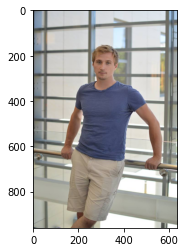

In [57]:
imshow(image)

In [58]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [59]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [60]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [61]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [62]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

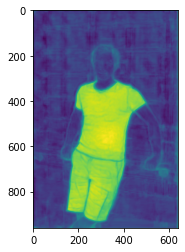

In [65]:
imshow(prediction)

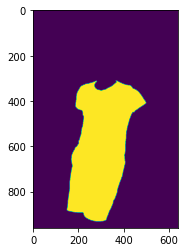

In [63]:
imshow(mask)

In [66]:
mask = unpad(mask, pads)

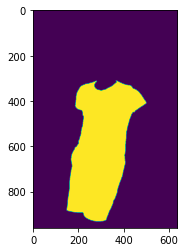

In [67]:
imshow(mask)

In [68]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)

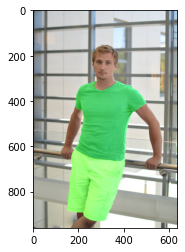

In [69]:
imshow(dst)

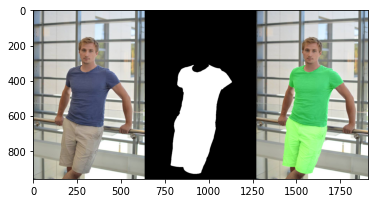

In [ ]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))

##Preprocessing

In [72]:
import os
from PIL import Image

path = 'images'
clothes = os.listdir(path)

In [80]:
# read images with clothes only
def getClothesOnly(x):
    if x.split('_')[2].split('.')[0] == '1':
        return x

new_clothes = list(filter(getClothesOnly, clothes))

In [87]:
clothes_images = []

for c in new_clothes:
    im = Image.open(f'images/{c}')
    clothes_images.append(im)

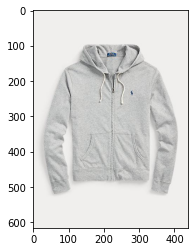

In [99]:
imshow(clothes_images[0])

In [142]:
def preprocess(cloth):
    transform = albu.Compose([albu.Normalize(p=1)], p=1)
    padded_image, pads = pad(cloth, factor=32, border=cv2.BORDER_CONSTANT)

    x = transform(image=padded_image)["image"]
    x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

    with torch.no_grad():
        prediction = model(x)[0][0]

    mask = (prediction > 0).cpu().numpy().astype(np.uint8)

    new_cloth_different_color = cv2.addWeighted(padded_image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 191, 255)).astype(np.uint8), 1, 0)

    mask[mask == 0] = 2
    mask[mask == 1] = 0
    mask[mask == 2] = 1

    new_cloth = cv2.addWeighted(padded_image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 191, 255)).astype(np.uint8), 1, 0)

    return new_cloth_different_color, new_cloth

(640, 448, 3)


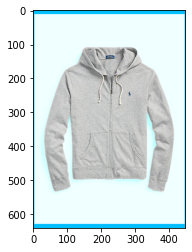

In [143]:
cloth_color, background_color = preprocess(np.array(clothes_images[0]))

imshow(background_color)